In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga del dataset
df = pd.read_csv('marketing_raw.csv',sep=",")

# Sección A: Análisis Exploratorio de Datos (EDA)

## A.1 Exploración de la estructura del dataset

In [ ]:
# Dimensiones
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (2205, 39)


El dataset contiene 2205 filas y 39 columnas. Cada fila representa un cliente individual, mientras que las columnas describen sus características sociodemográficas, comportamiento de compra y respuesta a campañas de marketing.

In [ ]:
# Primeras filas
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,$58138,0,0,58,$635,$88,$546,$172,$88,$88,...,0,0,0,0,1,0,0,$1529,1441,0
1,$46344,1,1,38,$11,$1,$6,$2,$1,$6,...,0,0,0,0,1,0,0,$21,15,0
2,$71613,0,0,26,$426,$49,$127,$111,$21,$42,...,1,0,0,0,1,0,0,$734,692,0
3,$26646,1,0,26,$11,$4,$20,$10,$3,$5,...,1,0,0,0,1,0,0,$48,43,0
4,$58293,1,0,94,$173,$43,$118,$46,$27,$15,...,0,0,0,0,0,0,1,$407,392,0


Las primeras filas permiten identificar la estructura general del dataset, así como la presencia de variables numéricas, monetarias y categóricas codificadas en formato binario.

In [ ]:
# ¿Qué tipo de información contiene el dataset y en qué formato?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Income                2205 non-null   object
 1   Kidhome               2205 non-null   int64 
 2   Teenhome              2205 non-null   int64 
 3   Recency               2205 non-null   int64 
 4   MntWines              2205 non-null   object
 5   MntFruits             2205 non-null   object
 6   MntMeatProducts       2205 non-null   object
 7   MntFishProducts       2205 non-null   object
 8   MntSweetProducts      2205 non-null   object
 9   MntGoldProds          2205 non-null   object
 10  NumDealsPurchases     2205 non-null   int64 
 11  NumWebPurchases       2205 non-null   int64 
 12  NumCatalogPurchases   2205 non-null   int64 
 13  NumStorePurchases     2205 non-null   int64 
 14  NumWebVisitsMonth     2205 non-null   int64 
 15  AcceptedCmp3          2205 non-null   

Se observa que variables monetarias tales como la columna de ***Income y gastos de acuerdo a la categoría (MntWines, MntFruits,..etc.)*** están almacenadas como tipo object, debido a que tienen el símbolo de $. Esto representa un problema de calidad de datos que debe corregirse antes de realizar análisis estadísticos ya que no se podrán hacer los cálculos.

## A.2 Problemas de calidad

In [ ]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


No se identifican valores nulos significativos en el dataset, lo que indica una buena calidad inicial de los datos en términos de completitud.

In [ ]:
df.describe()


,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,...,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,0.442177,0.506576,49.009070,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,...,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,518.707483,0.29932
std,0.537132,0.544380,28.932111,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,...,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,553.847248,0.68044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-283.000000,0.00000
25%,0.000000,0.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.00000
50%,0.000000,0.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,288.000000,0.00000
75%,1.000000,1.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,884.000000,0.00000
max,2.000000,2.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2458.000000,4.00000


### Observaciones generales

Las estadísticas descriptivas muestran que todas las variables numéricas cuentan con 2205 observaciones, lo que confirma la ausencia de valores faltantes en estas columnas.

### Variables sociodemográficas

***Edad (Age)***
*   Rango: 24 a 80 años
*   Media: 51 años
*   Mediana: 50 años

La variable Age presenta valores dentro de rangos coherentes para una población adulta, sin evidencias de valores extremos o inválidos.

***Antigüedad del cliente (Customer_Days)***
*   Rango: 2159 a 2858 días
*   Media: 2513 días

La antigüedad de los clientes muestra una dispersión moderada, indicando una base de clientes relativamente estable y con varios años de relación con la empresa.

### Variables de comportamiento de compra

***Ingresos (Income)***
*   Mínimo: 1,730
*   Máximo: 113,734
*   Media: 51,622

Se observa una alta dispersión en los ingresos anuales, lo cual sugiere la presencia de distintos segmentos socioeconómicos dentro de la base de clientes. Los valores elevados no se consideran errores, sino clientes de mayor poder adquisitivo.

***Variables de gasto por categoría (MntWines, MntFruits, MntMeatProducts, etc.)***

Todas presentan:
*   Valores mínimos cercanos a cero
*   Valores máximos elevados
*   Desviaciones estándar altas respecto a la media

Las variables de gasto presentan una alta variabilidad, lo que indica patrones de consumo heterogéneos entre los clientes. La presencia de valores elevados sugiere clientes de alto valor, sin evidencias claras de errores de registro.



***Gasto total (MntTotal) y gasto regular (MntRegularProds)***

MntRegularProds presenta un valor mínimo negativo (-283)

Se identifica un valor negativo en la variable MntRegularProds, lo cual no es coherente desde un punto de vista económico. Este hallazgo sugiere la existencia de posibles ajustes, devoluciones o errores de cálculo, y debe ser considerado en etapas posteriores de análisis.


### Variables binarias (campañas y respuesta)

***Variables como Response, AcceptedCmpOverall, Complain:***
*   Valores entre 0 y 1
*   Medias bajas (ej. Response = 0.15)

Las variables binarias muestran una baja tasa de respuesta a campañas, lo cual es consistente con escenarios reales de marketing, donde solo una fracción de los clientes responde positivamente.

El análisis estadístico descriptivo permitió identificar la distribución general de las variables, detectar una alta variabilidad en ingresos y gastos, y evidenciar un posible problema de calidad en la variable MntRegularProds debido a la presencia de valores negativos. En general, el dataset presenta coherencia y riqueza analítica, siendo adecuado para su posterior preprocesamiento y visualización.

## A.3 Identificación de outliers

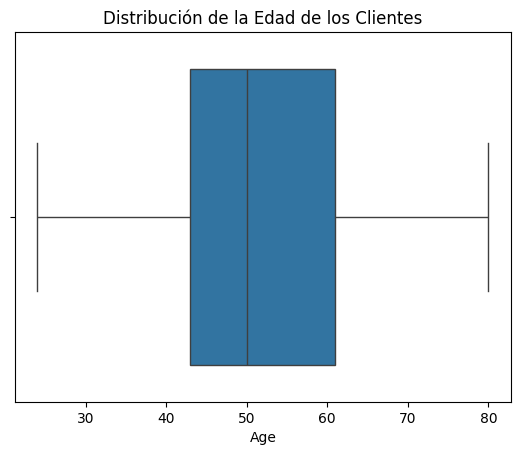

In [ ]:
plt.figure()
sns.boxplot(x=df['Age'])
plt.title('Distribución de la Edad de los Clientes')
plt.show()

El diagrama de caja permite visualizar la distribución de la edad de los clientes. No se observan valores extremos claramente inválidos, lo que indica que la variable se encuentra dentro de rangos coherentes

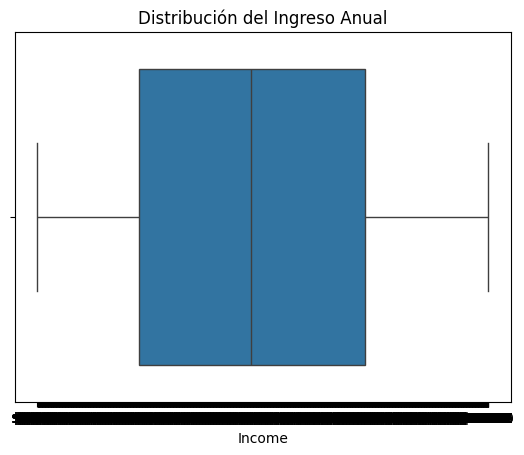

In [ ]:
plt.figure()
sns.boxplot(x=df['Income'])
plt.title('Distribución del Ingreso Anual')
plt.show()

El boxplot de la variable Income evidencia una alta dispersión en los ingresos anuales de los clientes, lo que sugiere la coexistencia de distintos segmentos socioeconómicos. Aunque se observan valores elevados, estos no se consideran outliers, sino clientes con mayor poder adquisitivo.

## A.4 Observaciones relevantes



*   El dataset presenta una estructura consistente y no muestra valores nulos significativos.
*   Las variables monetarias se encuentran almacenadas como texto debido al símbolo $, lo que requiere limpieza previa.
*   La variable Age no presenta outliers evidentes y se encuentra dentro de rangos coherentes.
*   Income y las variables de gasto muestran alta variabilidad, reflejando distintos perfiles de clientes.
*   Se detecta un valor negativo en MntRegularProds, lo cual representa una posible inconsistencia de datos.
*   Las variables categóricas están codificadas en formato binario y deberán ser reconstruidas.




# Sección B: Preprocesamiento de Datos

## B.1 Verificación de valores nulos

In [ ]:
df.isnull().sum()


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


No se identifican valores nulos en las variables del dataset, por lo que no fue necesario aplicar técnicas de imputación o eliminación de registros.

## B.2 Verificación de registros duplicados

In [ ]:
df.duplicated().sum()

np.int64(184)

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()


np.int64(0)

Se identificaron 184 registros duplicados en el dataset. La presencia de duplicados puede afectar los resultados del análisis al sobrerrepresentar ciertos perfiles de clientes, por lo que se procedió a su eliminación.

## B.3 Limpieza y transformación de variables monetarias

In [ ]:
# Conversión de variables monetarias a tipo numérico
columnas_Mnt = [
    'Income','MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'MntTotal','MntRegularProds'
]

for columna in columnas_Mnt:
    df[columna] = df[columna].replace('[\$,]', '', regex=True).astype(float)

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3525689659.py:9: SyntaxWarning: invalid escape sequence '\$'
  df[columna] = df[columna].replace('[\$,]', '', regex=True).astype(float)


Las variables monetarias se encontraban almacenadas como texto debido a la presencia del símbolo $. Se realizó su limpieza y conversión a tipo numérico para permitir el análisis estadístico y la correcta visualización en Power BI.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   float64
 5   MntFruits             2021 non-null   float64
 6   MntMeatProducts       2021 non-null   float64
 7   MntFishProducts       2021 non-null   float64
 8   MntSweetProducts      2021 non-null   float64
 9   MntGoldProds          2021 non-null   float64
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null   int64  
 15  AcceptedCmp3          2021

Tras la conversión, las variables monetarias se encuentran en formato numérico (float), lo que confirma que el proceso de limpieza fue exitoso.

## B.4 Tratamiento de valores inválidos

In [ ]:
df[df['Age'] == 99999].shape


(0, 39)

No se identificaron valores inválidos en la variable Age, por lo que no fue necesario aplicar un tratamiento adicional en esta etapa.

## B.5 Coherencia de variables monetarias

In [ ]:
df[['MntTotal','MntRegularProds']].describe()


,MntTotal,MntRegularProds
count,2021.000000,2021.000000
mean,563.789213,519.867392
std,576.775749,554.797857
min,4.000000,-283.000000
25%,55.000000,42.000000
50%,343.000000,288.000000
75%,964.000000,883.000000
max,2491.000000,2458.000000


Se detectó la presencia de valores negativos en la variable MntRegularProds, lo cual podría corresponder a ajustes o devoluciones. Estos valores se mantienen para su análisis posterior y no se modifican en esta etapa.

## Conclusion

Luego del preprocesamiento, el dataset presenta variables numéricas correctamente tipadas, sin valores inválidos evidentes y con una estructura adecuada para la reconstrucción de variables categóricas y su posterior análisis en Power BI.

# Sección C: Reconstrucción de Variables Categóricas

## C.1 Reconstrucción de la variable Marital_Status

Las variables relacionadas con el estado civil se encuentran codificadas mediante columnas binarias (marital_*). Para mejorar la interpretabilidad del dataset, se reconstruyó una única variable categórica.

In [ ]:
def get_marital_status(row):
    if row['marital_Single'] == 1:
        return 'Solo/a'
    elif row['marital_Married'] == 1:
        return 'Casado/a'
    elif row['marital_Together'] == 1:
        return 'Juntos/as'
    elif row['marital_Divorced'] == 1:
        return 'Divorciado/a'
    elif row['marital_Widow'] == 1:
        return 'Viudo/a'
    else:
        return 'Desconocido'




In [ ]:
df['Marital_Status'] = df.apply(get_marital_status, axis=1)

La creación de la variable Marital_Status permite representar el estado civil del cliente de forma más clara y reduce la redundancia generada por múltiples columnas binarias.

## C.2 Reconstrucción de la variable Education

De manera similar, el nivel educativo se encontraba representado mediante variables binarias (education_*). Se procedió a su consolidación en una sola variable categórica.

In [ ]:
def get_education(row):
    if row['education_Basic'] == 1:
        return 'Basico'
    elif row['education_Graduation'] == 1:
        return 'Graduado'
    elif row['education_Master'] == 1:
        return 'Maestro'
    elif row['education_PhD'] == 1:
        return 'PhD'
    elif row['education_2n Cycle'] == 1:
        return '2nd Ciclo'
    else:
        return 'Desconocido'

In [ ]:
df['Education'] = df.apply(get_education, axis=1)


La variable Education facilita el análisis del nivel educativo de los clientes y mejora la legibilidad del dataset para su posterior visualización.

## C.3 Eliminación de columnas originales

Una vez reconstruidas las variables categóricas, se eliminaron las columnas binarias originales para evitar redundancia y optimizar el modelo de datos.

In [ ]:
marital_cols = [
    'marital_Single','marital_Married',
    'marital_Together','marital_Divorced','marital_Widow'
]

education_cols = [
    'education_Basic','education_Graduation',
    'education_Master','education_PhD','education_2n Cycle'
]

df.drop(columns=marital_cols + education_cols, inplace=True)


## C.4 Validación final de las variables categóricas

In [ ]:
df[['Marital_Status','Education']].value_counts()


Marital_Status  Education
Casado/a        Graduado     392
Juntos/as       Graduado     252
Solo/a          Graduado     228
Casado/a        PhD          174
                Maestro      131
Divorciado/a    Graduado     112
Juntos/as       PhD          104
Solo/a          PhD           92
Juntos/as       Maestro       90
Casado/a        2nd Ciclo     70
Solo/a          Maestro       70
Juntos/as       2nd Ciclo     52
Divorciado/a    PhD           47
Solo/a          2nd Ciclo     35
Divorciado/a    Maestro       33
Viudo/a         Graduado      31
                PhD           22
Divorciado/a    2nd Ciclo     21
Casado/a        Basico        18
Solo/a          Basico        18
Juntos/as       Basico        11
Viudo/a         Maestro       11
                2nd Ciclo      5
Divorciado/a    Basico         1
Viudo/a         Basico         1
Name: count, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].fillna('Desconocido')
df['Education'] = df['Education'].fillna('Desconocido')

In [ ]:
df[['Marital_Status','Education']].isnull().sum()


,0
Marital_Status,0
Education,0


Se validaron las combinaciones de Marital_Status y Education, confirmando la correcta reconstrucción de ambas variables.

Luego, se identificaron valores nulos, los cuales fueron reemplazados por la categoría “Desconocido” para garantizar la consistencia del dataset.

## Conclusion

La reconstrucción de las variables categóricas permitió simplificar la estructura del dataset, mejorar su interpretabilidad y dejarlo preparado para el análisis y la visualización en Power BI.

# Sección D: Tratamiento de valores inválidos

## D.1 Identificación de valores inválidos

In [ ]:
df[df['Age'] == 99999].shape


(0, 31)

No se encontraron registros con el valor 99999 en la variable Age.

## D.2 Análisis y decisión de tratamiento

Tras la validación de la variable Age, se confirma que todos los valores se encuentran dentro de rangos coherentes para una población adulta. Por lo tanto, no fue necesario aplicar técnicas de imputación ni eliminación de registros para esta variable.

## D.3 Otros valores potencialmente inválidos

Durante el análisis exploratorio se detectó la presencia de valores negativos en la variable MntRegularProds. Dado que estos valores pueden corresponder a ajustes, devoluciones o correcciones contables, se decidió no modificarlos en esta etapa y mantenerlos para su análisis posterior.

## Conclusion

El tratamiento de valores inválidos permitió confirmar la coherencia de la variable Age y documentar posibles inconsistencias en variables monetarias, garantizando la transparencia y trazabilidad del proceso de limpieza de datos.

# Sección E: Validaciones finales

## E.1 Verificación de tipos de datos

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2021 non-null   float64
 1   Kidhome              2021 non-null   int64  
 2   Teenhome             2021 non-null   int64  
 3   Recency              2021 non-null   int64  
 4   MntWines             2021 non-null   float64
 5   MntFruits            2021 non-null   float64
 6   MntMeatProducts      2021 non-null   float64
 7   MntFishProducts      2021 non-null   float64
 8   MntSweetProducts     2021 non-null   float64
 9   MntGoldProds         2021 non-null   float64
 10  NumDealsPurchases    2021 non-null   int64  
 11  NumWebPurchases      2021 non-null   int64  
 12  NumCatalogPurchases  2021 non-null   int64  
 13  NumStorePurchases    2021 non-null   int64  
 14  NumWebVisitsMonth    2021 non-null   int64  
 15  AcceptedCmp3         2021 non-null   int64 

Se confirma que las variables monetarias se encuentran en formato numérico, las variables categóricas reconstruidas (Marital_Status y Education) están correctamente definidas como texto, y las variables binarias mantienen valores coherentes.

## E.2 Validación de valores nulos

In [ ]:
df.isnull().sum()


,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


No se identifican valores nulos en el dataset luego del proceso de limpieza y reconstrucción de variables.

## E.3 Validación de duplicados

In [ ]:
df.duplicated().sum()


np.int64(0)

Se confirma la ausencia de registros duplicados tras el proceso de depuración, garantizando la unicidad de las observaciones.

## E.4 Coherencia general del dataset

El dataset presenta coherencia entre las variables sociodemográficas, de comportamiento de compra y respuesta a campañas. Las transformaciones realizadas no afectan la integridad de los datos y permiten un análisis confiable.